In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58892288/58889256 [==============================] - 19s 0us/step


In [3]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
conv_base.trainable = False

In [7]:
train_data_path = "C:/Users/tusha/Downloads/social media image detector api/train"
validation_data_path = "C:/Users/tusha/Downloads/social media image detector api/test"

Found 37413 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


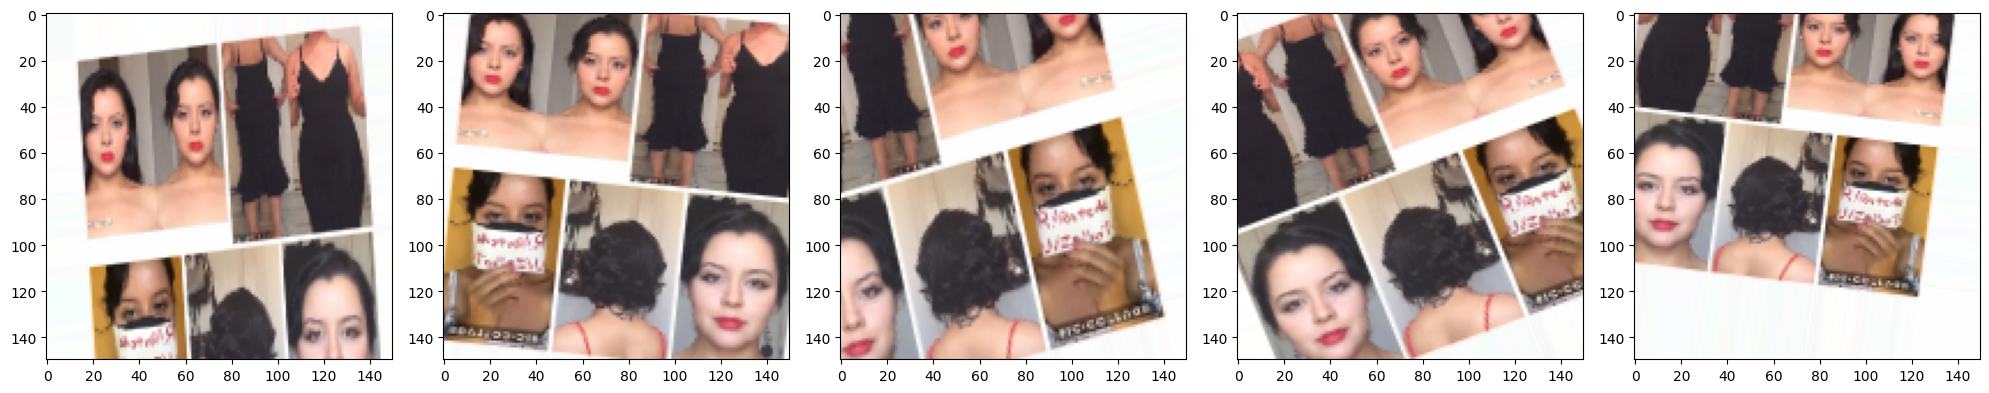

In [8]:
"""# Data Preprocessing"""

training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')
 
training_data.class_indices
 
valid_datagen = ImageDataGenerator(rescale=1./255)
 
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')
 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
model_path = 'C:/Users/tusha/Downloads/social media image detector api/trainhorse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
# train cnn model
history = model.fit(training_data, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/10
1170/1170 [==============================] - 769s 651ms/step - loss: 0.2232 - accuracy: 0.9222 - val_loss: 0.6575 - val_accuracy: 0.7448

Epoch 00001: val_accuracy improved from -inf to 0.74475, saving model to C:/Users/tusha/Downloads/social media image detector api\trainhorse_or_human_predictor.h5
Epoch 2/10
1170/1170 [==============================] - 664s 568ms/step - loss: 0.1472 - accuracy: 0.9437 - val_loss: 0.4729 - val_accuracy: 0.7997

Epoch 00002: val_accuracy improved from 0.74475 to 0.79975, saving model to C:/Users/tusha/Downloads/social media image detector api\trainhorse_or_human_predictor.h5
Epoch 3/10
1170/1170 [==============================] - 646s 553ms/step - loss: 0.1379 - accuracy: 0.9483 - val_loss: 0.3915 - val_accuracy: 0.8338

Epoch 00003: val_accuracy improved from 0.79975 to 0.83375, saving model to C:/Users/tusha/Downloads/social media image detector api\trainhorse_or_human_predictor.h5
Epoch 4/10
1170/1170 [==============================] - 67

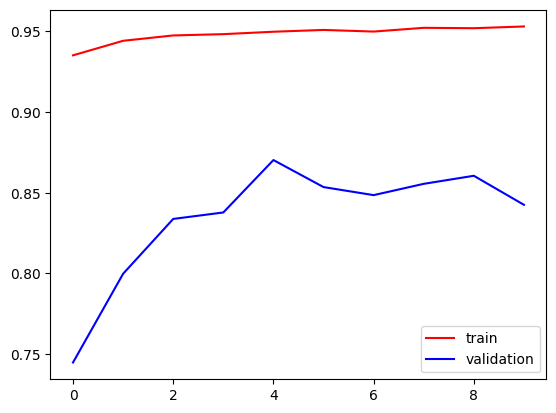

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

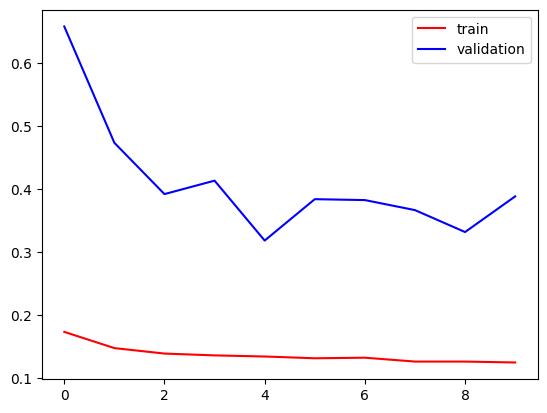

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()